In [1]:
# ====================================================================================
#  seleccionar el corte deseado (ver archivo de densidades) y cambiar el numero de plot
# ====================================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os
from cuts import density_data
rc('text', usetex=True)
rc('font', family='serif')
% matplotlib inline

In [52]:
ab = str(raw_input("Model: "))
model = ab + "_millennium"
type_cut = int(raw_input("Select criteria:\n Stellarmass cuts: 1\n SFR cuts: 2\n Choice:"))

Model: L16
Select criteria:
 Stellarmass cuts: 1
 SFR cuts: 2
 Choice:2


In [ ]:
path = "/home/esteban/Escritorio/Practica/Data/" + model
os.chdir( path )

In [ ]:
#import cuts
sfr = np.load('sfr.npy')
stellarmass = np.load('stellarmass.npy')
if ab == 'G13': log_centralmvir = np.log10(np.load('centralmvir.npy') + 1e-10) + 10 # MPA
else: log_centralmvir = np.log10(np.load('mdhalo.npy') + 1e-10) + 10  # Durham
Type = np.load('type.npy')

#Density samples (Only 1 run!) Done!
#cuts.density_data(sfr, stellarmass)

In [ ]:
ab = 'L16'
model = ab + "_millennium"
path = "/home/esteban/Escritorio/Practica/Data/" + model
xi_sam_path = path + '/xi_sam/' + 'SFR/'
logr, xi, DD, RR = np.loadtxt(xi_sam_path + 'xi_2.5.txt', unpack = True)

#os.chdir(path)
#f = open('G13_xi_sergio.txt', 'w')
#for i in range(len(logr)):
#    print >> f, logr[i], xi[i], DD[i], RR[i]
#f.close()

In [ ]:
#xi = xi - 1
#os.chdir( xi_sam_path )
#np.savetxt('xi_2.5.txt', np.array([logr, xi, DD, RR]).T)

In [60]:
path = "/home/esteban/Escritorio/Practica/Data/" + model

if type_cut == 1: tc = 'Stellar Mass/'
else: tc = 'SFR/'

cat_path = path + '/Catalogues/'+ tc
data = np.load(cat_path + 'cat_d3_fixed.npy')
x,y,z,halomass = data[:,0], data[:,1], data[:,2], data[:,3]


logm_min = 10
logm_max = 14.8333333
NBIN = 29
bin_width = (logm_max - logm_min)/NBIN

mass_labels = ((halomass - logm_min)/(logm_max - logm_min) * NBIN).astype(int)
bin_width = (logm_max - logm_min)/NBIN
bins = np.array([logm_min + bin_width*i for i in range(NBIN)]) + bin_width *.5

In [61]:
HOD = np.zeros(NBIN)
for i in range(NBIN):
    idx = np.where(mass_labels ==i)[0]
    haloes_mask = halomass[idx]
    Len_Haloes = len(np.unique(haloes_mask)) + 1e-10
    Len_Full = len(idx)
    HOD[i]      = Len_Full / Len_Haloes 
        
HOD = np.log10(HOD + 1e-10)


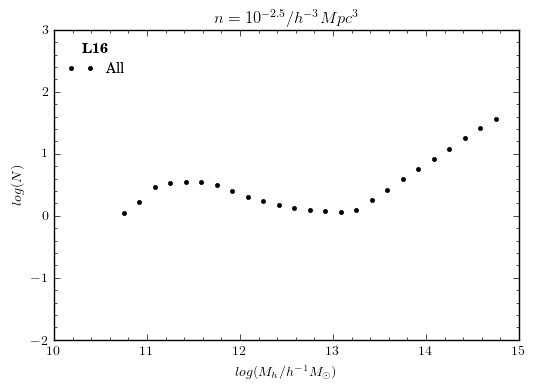

In [62]:
f = plt.figure()
plt.plot(bins, HOD, 'k.', label = 'All')
#plt.plot(bins, line, 'k--', lw = .5 )
plt.title(r"$n = 10^{-2.5} /h^{-3} Mpc^3$")
plt.xlabel(r"$log(M_h / h^{-1}M_{\odot})$", fontsize = 10)
plt.ylabel(r"$log(N)$", fontsize = 10)
plt.ylim(-2,3)
plt.xlim(10,15)
plt.minorticks_on()
plt.legend(loc='upper left',title = r"\textbf{%s}"% ab, frameon = False, prop={'size':10})
pp = cat_path + '/HOD/'
os.chdir(pp)
f.savefig('hod_2.5.pdf')

In [ ]:
logm_min = 10
logm_max = 15.
NBIN = 30

mass_labels = ((log_centralmvir - logm_min)/(logm_max - logm_min) * NBIN).astype(int)
bin_width = (logm_max - logm_min)/NBIN
bins = np.array([logm_min + bin_width*i for i in range(NBIN)]) + bin_width *.5

In [ ]:
#n = [5, 10, 15, 20, 25]
n = [1,2,3]
#log_rho, mass_cuts, sfr_cuts = np.loadtxt('density_data.txt', unpack = True)

for k in n:
    path = "/home/esteban/Escritorio/Practica/Data/" + model
    
    os.chdir( path )
    
    %%time
    # Density selection
    # =================
    #   Fila    log(rho)
    #    25      -1.5
    #    20      -2.0
    #    15      -2.5
    #    10      -3.0
    #     5      -3.5
    # =================

    #log_rho, mass_cuts, sfr_cuts = np.loadtxt('density_data.txt', unpack = True)
    #rho, mass_cut, sfr_cut = log_rho[k], mass_cuts[k], sfr_cuts[k]

    #if type_cut == 1: feature = stellarmass; cut = mass_cut ; tc = 'Stellar Mass/'
    #else: feature = sfr; cut = sfr_cut; tc = 'SFR/'

    # To make HODs
    HOD = np.zeros(NBIN)
    Cent = np.zeros(NBIN)
    Sats = np.zeros(NBIN)

    for i in range(NBIN):

        idx = np.where(mass_labels == i)[0]
        Halos = np.where(Type[idx] == 0)[0] 

        mask_HOD = feature[idx] > cut # Msun/year
        HOD_ID = np.where(mask_HOD)[0]

        mask_Cent = np.where(Type[idx][HOD_ID] == 0)[0]
        mask_Sats = np.where(Type[idx][HOD_ID] != 0)[0]

        Len_Full = len(HOD_ID)
        Len_Cent = len(mask_Cent)
        Len_Sats = len(mask_Sats)
        Len_Haloes = float(len(Halos)) + 1e-10

        HOD[i]      = Len_Full / Len_Haloes 
        Cent[i]     = Len_Cent / Len_Haloes
        Sats[i]     = Len_Sats / Len_Haloes
        
    HOD = np.log10(HOD + 1e-10)
    Cent = np.log10(Cent + 1e-10)
    Sats = np.log10(Sats + 1e-10)

    #mm = path + '/hod_data/' + tc 
    #np.savetxt(mm + 'hod_%.1f' % abs(rho), np.array([bins, HOD, Cent, Sats]).T)


In [ ]:
plt.plot(bins, HOD, 'k.', label = 'All')
plt.plot(bins, Cent, 'r--', label = 'Cent')
plt.plot(bins, Sats, 'b--', label = 'Sats')
plt.plot(bins, line, 'k--', lw = .5 )
plt.title(r"$n = 10^{-%.1f} /h^{-3} Mpc^3$")
plt.xlabel(r"$log(M_h / h^{-1}M_{\odot})$", fontsize = 10)
plt.ylabel(r"$log(N)$", fontsize = 10)
plt.ylim(-2,3)
plt.xlim(10,15)
plt.minorticks_on()
plt.legend(loc='upper left',title = r"\textbf{%s}"% ab, frameon = False, prop={'size':10})

In [ ]:
# ======== TO PLOT ===========
f = plt.figure()
line = np.zeros(NBIN)

path = "/home/esteban/Escritorio/Practica/Plots/" + model + '/HOD/' + tc
os.chdir( path )
rho = 3.5

bins, HOD, Cent, Sats = np.loadtxt(mm + 'hod_%.1f' %rho, unpack=True)

plt.plot(bins, HOD, 'k.', label = 'All')
plt.plot(bins, Cent, 'r--', label = 'Cent')
plt.plot(bins, Sats, 'b--', label = 'Sats')
plt.plot(bins, line, 'k--', lw = .5 )
plt.title(r"$n = 10^{-%.1f} /h^{-3} Mpc^3$" %rho)
plt.xlabel(r"$log(M_h / h^{-1}M_{\odot})$", fontsize = 10)
plt.ylabel(r"$log(N)$", fontsize = 10)
plt.ylim(-2,3)
plt.xlim(10,15)
plt.minorticks_on()
plt.legend(loc='upper left',title = r"\textbf{%s}"% ab, frameon = False, prop={'size':10})
f.savefig('hod_%.1f.pdf' %rho)